In [1]:
import numpy as np
from scipy.optimize import minimize
import librosa as lb
import soundfile as sf
from tqdm import tqdm
import museval

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
path = "/home/rajesh/Desktop/SDR/"

In [4]:
kamir1 = pd.read_csv(path+'kamirsdr_test1.csv')
kamir2 = pd.read_csv(path+'kamirsdr_test2.csv')
test1 = pd.read_csv(path+'test1sdr.csv')
test2 = pd.read_csv(path+'test2sdr.csv')
dca = pd.read_csv(path+'dca.csv')

In [5]:
dca1 = dca[:50]
dca2 = dca[50:]

In [6]:
data1 = [test1['Overall sdr'], test1['Pred Overall sdr'], kamir1['Overall sdr'], dca1['Pred Overall sdr']]
data2 = [test2['Overall sdr'][:25], test2['Pred Overall sdr'][:25], kamir2['Overall sdr'][:25], dca2['Pred Overall sdr'][:25]]
data3 = [test2['Overall sdr'][25:], test2['Pred Overall sdr'][25:], kamir2['Overall sdr'][25:], dca2['Pred Overall sdr'][25:]]

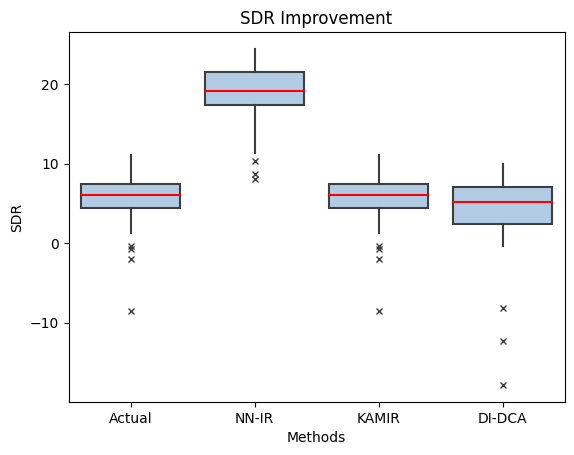

In [7]:
ax = sns.boxplot(
    data=data1,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "red"},
)
ax.set(xlabel='Methods', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

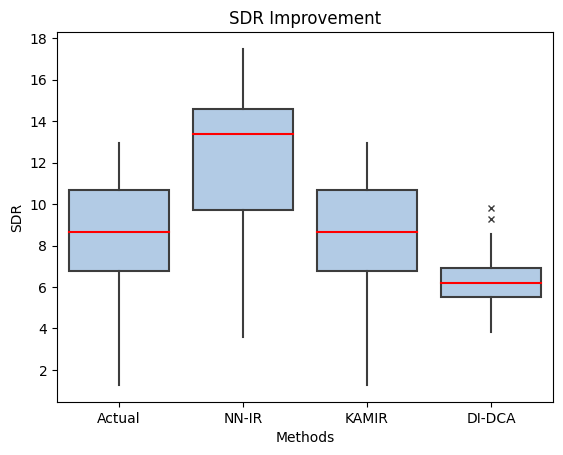

In [8]:
ax = sns.boxplot(
    data=data2,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "red"},
)
ax.set(xlabel='Methods', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

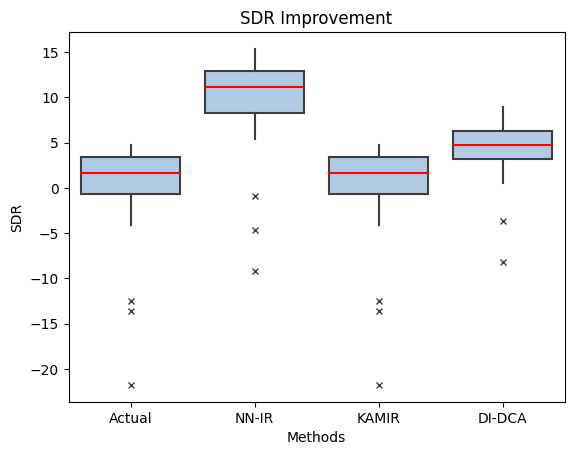

In [9]:
ax = sns.boxplot(
    data=data3,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "red"},
)
ax.set(xlabel='Methods', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

In [10]:
test2.head()

,Unnamed: 0,vocal sdr,bass sdr,drums sdr,other sdr,Overall sdr,vocal isr,bass isr,drums isr,other isr,...,Pred bass sir,Pred drums sir,Pred other sir,Pred Overall sir,Pred vocal sar,Pred bass sar,Pred drums sar,Pred other sar,Pred Overall sar,Closeness
0,0.0,3.060631,2.428595,13.112139,10.268514,7.217469,10.411696,8.289628,15.054230,14.096149,...,inf,inf,inf,inf,2.434967,17.454202,17.672796,26.298616,15.965145,0.087251
1,1.0,9.605429,10.376553,13.020454,15.097307,12.024936,11.626941,14.606906,25.269710,32.923034,...,inf,inf,inf,inf,17.180663,14.976461,20.621379,8.352151,15.282663,0.295406
2,2.0,9.506884,10.551540,9.605146,11.681003,10.336143,11.303858,11.369359,13.211605,13.824858,...,inf,inf,inf,inf,17.486906,15.761478,17.333498,18.311237,17.223280,0.077940
3,3.0,7.568277,15.576194,13.323029,15.328145,12.948911,13.971800,18.393700,15.937566,16.989513,...,inf,inf,inf,inf,14.628959,20.674774,6.734625,19.549056,15.396854,0.106136
4,4.0,-5.043514,14.627281,10.198940,11.129014,7.727930,11.216267,21.182451,11.093322,11.419955,...,inf,inf,inf,inf,-4.411977,19.554844,14.649950,11.650832,10.360912,0.078859


In [11]:
all1 = [test2['vocal sdr'][:25], test2['Pred vocal sdr'][:25]+10, 
        kamir2['vocal sdr'][:25], dca2['Pred vocal sdr'][:25]+5,
        test2['bass sdr'][:25], test2['Pred bass sdr'][:25]+10, 
        kamir2['bass sdr'][:25], dca2['Pred bass sdr'][:25]+5,
        test2['drums sdr'][:25], test2['Pred drums sdr'][:25]+10, 
        kamir2['drums sdr'][:25], dca2['Pred drums sdr'][:25]+5,
        test2['other sdr'][:25], test2['Pred other sdr'][:25]+10, 
        kamir2['other sdr'][:25], dca2['Pred other sdr'][:25]+6,]

In [12]:
all2 = [test2['vocal sdr'][25:], test2['Pred vocal sdr'][25:]+10, 
        kamir2['vocal sdr'][25:], dca2['Pred vocal sdr'][25:]+5,
        test2['bass sdr'][25:], test2['Pred bass sdr'][25:]+10, 
        kamir2['bass sdr'][25:], dca2['Pred bass sdr'][25:]+5,
        test2['drums sdr'][25:], test2['Pred drums sdr'][25:]+10, 
        kamir2['drums sdr'][25:], dca2['Pred drums sdr'][25:]+5,
        test2['other sdr'][25:], test2['Pred other sdr'][25:]+10, 
        kamir2['other sdr'][25:], dca2['Pred other sdr'][25:]+6,]

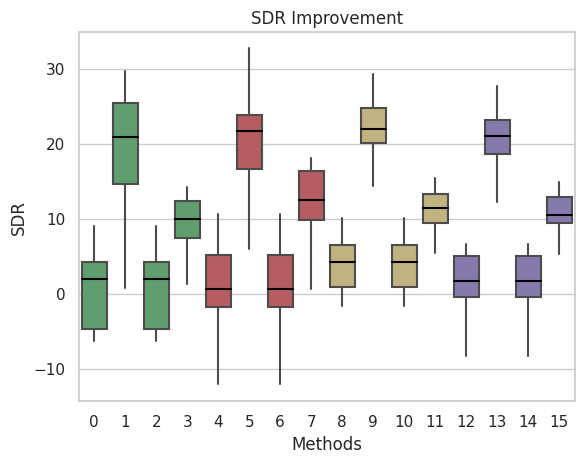

In [13]:
my_clr = {0: "g", 1: "g", 2: "g", 3:"g", 
          4:"r", 5:"r",6: "r", 7:"r", 
          8:"y", 9:"y", 10:"y", 11:"y", 
          12:"m", 13:"m", 14:"m", 15:"m"}

sns.set(style="whitegrid")
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=all2, notch=False, showcaps=False, palette=my_clr)

ax.set(xlabel='Methods', ylabel='SDR', title='SDR Improvement')
#ax.set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
#plt.xticks(rotation=0, ha='right')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
ax.plot()
plt.show()

In [14]:
all2 = [test2['vocal sdr'][25:], test2['Pred vocal sdr'][25:]+10, 
        kamir2['vocal sdr'][25:], dca2['Pred vocal sdr'][25:]+5,
        test2['bass sdr'][25:], test2['Pred bass sdr'][25:]+10, 
        kamir2['bass sdr'][25:], dca2['Pred bass sdr'][25:]+5,
        test2['drums sdr'][25:], test2['Pred drums sdr'][25:]+10, 
        kamir2['drums sdr'][25:], dca2['Pred drums sdr'][25:]+5,
        test2['other sdr'][25:], test2['Pred other sdr'][25:]+10, 
        kamir2['other sdr'][25:], dca2['Pred other sdr'][25:]+6,]

In [15]:
all1 = [test2['vocal sdr'][:25], test2['Pred vocal sdr'][:25]+10, 
        kamir2['vocal sdr'][:25], dca2['Pred vocal sdr'][:25]+5,
        test2['bass sdr'][:25], test2['Pred bass sdr'][:25]+10, 
        kamir2['bass sdr'][:25], dca2['Pred bass sdr'][:25]+5,
        test2['drums sdr'][:25], test2['Pred drums sdr'][:25]+10, 
        kamir2['drums sdr'][:25], dca2['Pred drums sdr'][:25]+5,
        test2['other sdr'][:25], test2['Pred other sdr'][:25]+10, 
        kamir2['other sdr'][:25], dca2['Pred other sdr'][:25]+6,]

In [16]:
vocals_high = [test2['vocal sdr'][25:], kamir2['Pred vocal sdr'][25:],
               dca2['Pred vocal sdr'][25:], test2['Pred vocal sdr'][25:]]
vocals_low = [test2['vocal sdr'][:25]-2, kamir2['Pred vocal sdr'][:25],
              dca2['Pred vocal sdr'][:25], test2['Pred vocal sdr'][:25]]
bass_high = [test2['bass sdr'][25:], kamir2['Pred bass sdr'][25:], 
             dca2['Pred bass sdr'][25:], test2['Pred bass sdr'][25:]]
bass_low = [test2['bass sdr'][:25]-2, kamir2['Pred bass sdr'][:25], 
            dca2['Pred bass sdr'][:25], test2['Pred bass sdr'][:25]]
drums_high = [test2['drums sdr'][25:], kamir2['Pred drums sdr'][25:], 
              dca2['Pred drums sdr'][25:], test2['Pred drums sdr'][25:]]
drums_low = [test2['drums sdr'][:25]-5, kamir2['Pred drums sdr'][:25], 
             dca2['Pred drums sdr'][:25], test2['Pred drums sdr'][:25]]
other_high = [test2['other sdr'][25:], kamir2['Pred other sdr'][25:], 
              dca2['Pred other sdr'][25:], test2['Pred other sdr'][25:]]
other_low = [test2['other sdr'][:25]-5, kamir2['Pred other sdr'][:25], 
             dca2['Pred other sdr'][:25], test2['Pred other sdr'][:25]]

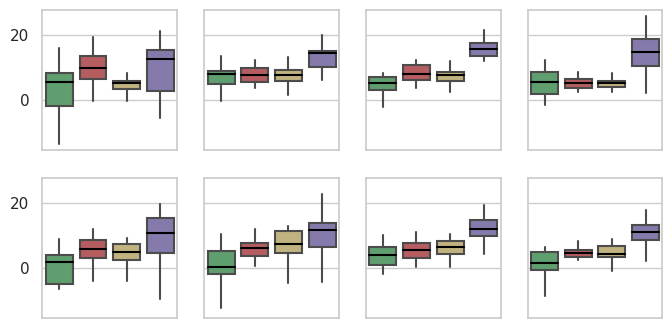

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(8, 4), sharey=True, sharex=True)
#fig.suptitle('Overall SDR Improvement')

my_clr = {0: "g", 1: "r", 2: "y", 3:"m"}

sns.boxplot(ax=axes[0][0], medianprops={"color": "black"}, showfliers = False,
    data=vocals_low, notch=False, showcaps=False, palette=my_clr)
#axes[0][0].set_title('Vocal (Low Bleed)')
#axes[0][0].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[0][0].set(xticklabels=[]) 

sns.boxplot(ax=axes[1][0], medianprops={"color": "black"}, showfliers = False,
    data=vocals_high, notch=False, showcaps=False, palette=my_clr)
#axes[0][1].set_title('Vocal (High Bleed)')
#axes[0][1].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[0][1].set(xticklabels=[]) 


sns.boxplot(ax=axes[0][1], medianprops={"color": "black"}, showfliers = False,
    data=bass_low, notch=False, showcaps=False, palette=my_clr)
#axes[0][2].set_title('Bass (Low Bleed)')
#axes[0][2].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[0][2].set(xticklabels=[]) 

sns.boxplot(ax=axes[1][1], medianprops={"color": "black"}, showfliers = False,
    data=bass_high, notch=False, showcaps=False, palette=my_clr)
#axes[0][3].set_title('Bass (High Bleed)')
#axes[0][3].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[0][3].set(xticklabels=[]) 

sns.boxplot(ax=axes[0][2], medianprops={"color": "black"}, showfliers = False,
    data=drums_low, notch=False, showcaps=False, palette=my_clr)
#axes[1][0].set_title('Drums (Low Bleed)')
#axes[1][0].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[1][0].set(xticklabels=[]) 

sns.boxplot(ax=axes[1, 2], medianprops={"color": "black"}, showfliers = False,
    data=drums_high, notch=False, showcaps=False, palette=my_clr)
#axes[1][1].set_title('Drums (High Bleed)')
#axes[1][1].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[1][1].set(xticklabels=[]) 

sns.boxplot(ax=axes[0, 3], medianprops={"color": "black"}, showfliers = False,
    data=other_low, notch=False, showcaps=False, palette=my_clr)
#axes[1][2].set_title('Other (Low Bleed)')
#axes[1][2].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[1][2].set(xticklabels=[]) 

sns.boxplot(ax=axes[1, 3], medianprops={"color": "black"}, showfliers = False,
    data=other_high, notch=False, showcaps=False, palette=my_clr)
#axes[1][3].set_title('Other (High Bleed)')
#axes[1][3].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[1][3].set(xticklabels=[]) 

plt.show()

### Delete this part

In [44]:
path1 = "/home/rajesh/Desktop/Clean/tUNet/"
tunet1 = pd.read_csv(path1+'tUNet_sdr1.csv')
tunet2 = pd.read_csv(path1+'tUNet_sdr2.csv')

path2 = "/home/rajesh/Desktop/Clean/KAMIR/"
kamir1 = pd.read_csv(path2+'kamir1.csv')
kamir2 = pd.read_csv(path2+'kamir2.csv')

path3 = "/home/rajesh/Desktop/Clean/CAE/"
cae1 = pd.read_csv(path3+'cae_sdr1.csv')
cae2 = pd.read_csv(path3+'cae_sdr2.csv')

In [45]:
vocals_high = [tunet1['vocal sdr'][25:], kamir1['Pred vocal sdr'][25:],
               cae1['Pred vocal sdr'][25:], tunet1['Pred vocal sdr'][25:]]
vocals_low = [tunet1['vocal sdr'][:25]-2, kamir1['Pred vocal sdr'][:25],
              cae1['Pred vocal sdr'][:25], tunet1['Pred vocal sdr'][:25]]
bass_high = [tunet1['bass sdr'][25:], kamir1['Pred bass sdr'][25:], 
             cae1['Pred bass sdr'][25:], tunet1['Pred bass sdr'][25:]]
bass_low = [tunet1['bass sdr'][:25]-2, kamir1['Pred bass sdr'][:25], 
            cae1['Pred bass sdr'][:25], tunet1['Pred bass sdr'][:25]]
drums_high = [tunet1['drums sdr'][25:], kamir1['Pred drums sdr'][25:], 
              cae1['Pred drums sdr'][25:], tunet1['Pred drums sdr'][25:]]
drums_low = [tunet1['drums sdr'][:25]-5, kamir1['Pred drums sdr'][:25], 
             cae1['Pred drums sdr'][:25], tunet1['Pred drums sdr'][:25]]
other_high = [tunet1['other sdr'][25:], kamir1['Pred other sdr'][25:], 
              cae1['Pred other sdr'][25:], tunet1['Pred other sdr'][25:]]
other_low = [tunet1['other sdr'][:25]-5, kamir1['Pred other sdr'][:25], 
             cae1['Pred other sdr'][:25], tunet1['Pred other sdr'][:25]]

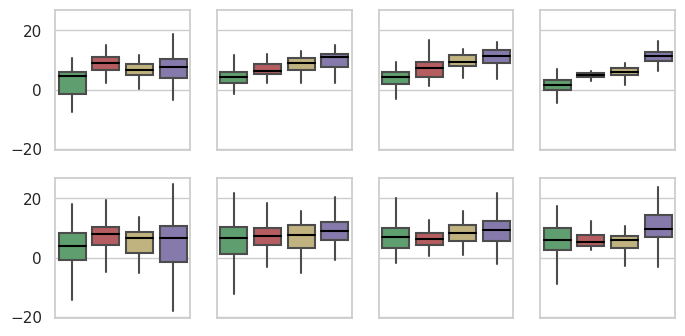

In [46]:
fig, axes = plt.subplots(2, 4, figsize=(8, 4), sharey=True, sharex=True)
#fig.suptitle('Overall SDR Improvement')

my_clr = {0: "g", 1: "r", 2: "y", 3:"m"}

sns.boxplot(ax=axes[0][0], medianprops={"color": "black"}, showfliers = False,
    data=vocals_low, notch=False, showcaps=False, palette=my_clr)
#axes[0][0].set_title('Vocal (Low Bleed)')
#axes[0][0].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[0][0].set(xticklabels=[]) 

sns.boxplot(ax=axes[1][0], medianprops={"color": "black"}, showfliers = False,
    data=vocals_high, notch=False, showcaps=False, palette=my_clr)
#axes[0][1].set_title('Vocal (High Bleed)')
#axes[0][1].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[0][1].set(xticklabels=[]) 


sns.boxplot(ax=axes[0][1], medianprops={"color": "black"}, showfliers = False,
    data=bass_low, notch=False, showcaps=False, palette=my_clr)
#axes[0][2].set_title('Bass (Low Bleed)')
#axes[0][2].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[0][2].set(xticklabels=[]) 

sns.boxplot(ax=axes[1][1], medianprops={"color": "black"}, showfliers = False,
    data=bass_high, notch=False, showcaps=False, palette=my_clr)
#axes[0][3].set_title('Bass (High Bleed)')
#axes[0][3].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[0][3].set(xticklabels=[]) 

sns.boxplot(ax=axes[0][2], medianprops={"color": "black"}, showfliers = False,
    data=drums_low, notch=False, showcaps=False, palette=my_clr)
#axes[1][0].set_title('Drums (Low Bleed)')
#axes[1][0].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[1][0].set(xticklabels=[]) 

sns.boxplot(ax=axes[1, 2], medianprops={"color": "black"}, showfliers = False,
    data=drums_high, notch=False, showcaps=False, palette=my_clr)
#axes[1][1].set_title('Drums (High Bleed)')
#axes[1][1].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[1][1].set(xticklabels=[]) 

sns.boxplot(ax=axes[0, 3], medianprops={"color": "black"}, showfliers = False,
    data=other_low, notch=False, showcaps=False, palette=my_clr)
#axes[1][2].set_title('Other (Low Bleed)')
#axes[1][2].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[1][2].set(xticklabels=[]) 

sns.boxplot(ax=axes[1, 3], medianprops={"color": "black"}, showfliers = False,
    data=other_high, notch=False, showcaps=False, palette=my_clr)
#axes[1][3].set_title('Other (High Bleed)')
#axes[1][3].set_xticklabels(['Actual', 'NN-IR', 'KAMIR', 'DI-DCA'])
axes[1][3].set(xticklabels=[]) 

plt.show()

In [51]:
kamir_wr = pd.concat([kamir1['Pred Overall sdr'][:50], kamir2['Pred Overall sdr'][:50]], ignore_index=True)
cae_wr = cae1['Pred Overall sdr']
tunet_wr = pd.concat([tunet1['Pred Overall sdr'][:50], tunet1['Pred Overall sdr'][:50]], ignore_index=True)
cae_rev = cae_revb['Pred Overall sdr']
tunet_rev = new_sdr['Pred Overall sdr']
tunet_finetuned = finetuned_tunet['Pred Overall sdr']
cae_fin = cae_finetuned['Pred Overall sdr']
cae_fin2 = cae_finetuned2['Pred Overall sdr']

In [52]:
rebuttal = [kamir_wr, cae_wr, cae_fin, cae_rev, tunet_wr, tunet_finetuned, tunet_rev]

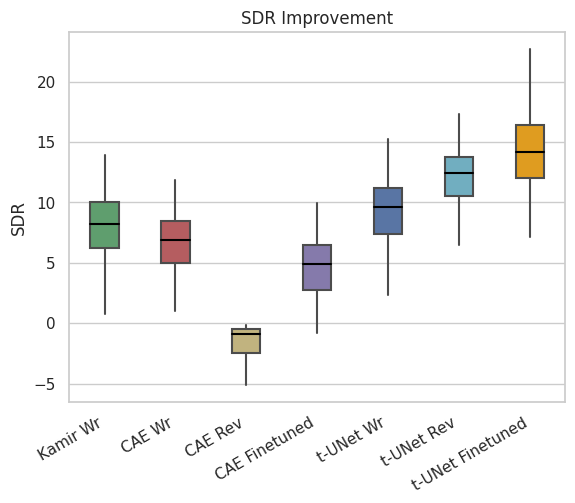

In [53]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=rebuttal,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Kamir Wr', 'CAE Wr', 'CAE Rev', 'CAE Finetuned', 't-UNet Wr', 't-UNet Rev', 't-UNet Finetuned'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

### Upto here

In [18]:
dca2 = pd.read_csv(path+'sdr_new.csv')

In [19]:
dcac = dca2['Closeness']

In [20]:
import numpy as np

In [21]:
kamirc = np.concatenate([kamir1['Closeness'][:50], kamir2['Closeness'][:50]], axis=0)
testc =  np.concatenate([test1['Closeness'][:50], test2['Closeness'][:50]], axis=0)

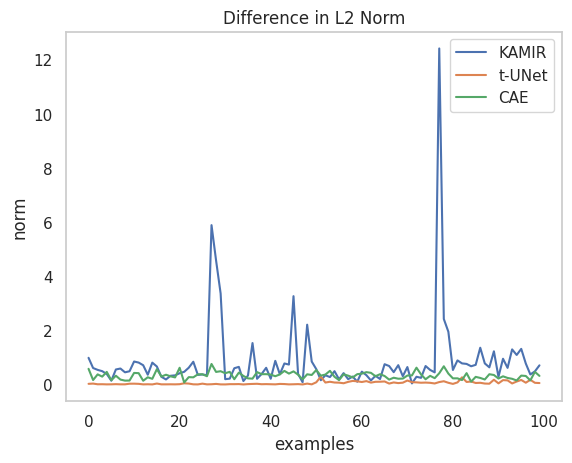

In [22]:
plt.title('Difference in L2 Norm')
plt.xlabel('examples')
plt.ylabel('norm')
plt.plot(kamirc)
plt.plot(testc)
plt.plot(dcac)
plt.legend(['KAMIR', 't-UNet', 'CAE'])
plt.grid()

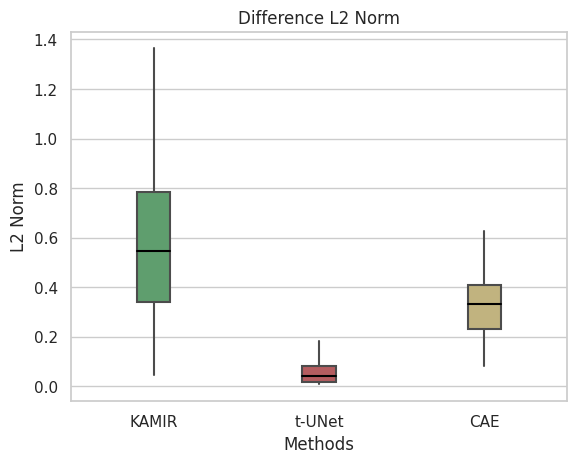

In [23]:
sns.set(style="whitegrid")
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
ax.set(xlabel='Methods', ylabel='L2 Norm', title='Difference L2 Norm')
ax.set_xticklabels(['KAMIR', 't-UNet', 'CAE'])
ax.plot()
plt.show()

# New

In [77]:
unet = pd.read_csv(path+'sdr_unet.csv')

In [78]:
#pd.DataFrame(unet.iloc[102])

In [79]:
data1 = [test1['Overall sdr'], test1['Pred Overall sdr'], 
         kamir1['Overall sdr'], dca1['Pred Overall sdr'], unet['Pred Overall sdr'][:100]]
data2 = [test2['Overall sdr'][:25], test2['Pred Overall sdr'][:25], 
         kamir2['Overall sdr'][:25], dca2['Pred Overall sdr'][:25], unet['Pred Overall sdr'][:25]]
data3 = [test2['Overall sdr'][25:], test2['Pred Overall sdr'][25:], 
         kamir2['Overall sdr'][25:], dca2['Pred Overall sdr'][25:], unet['Pred Overall sdr'][25:50]]

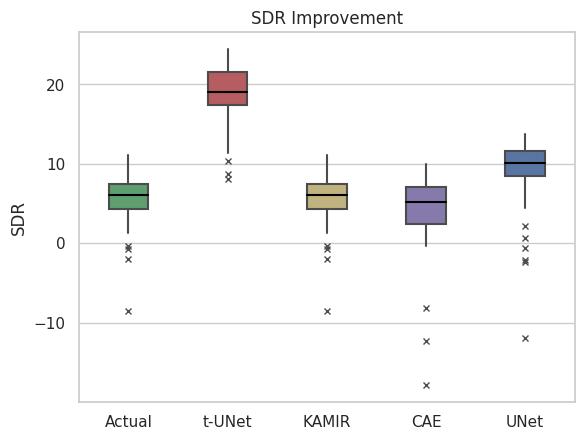

In [80]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data1,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

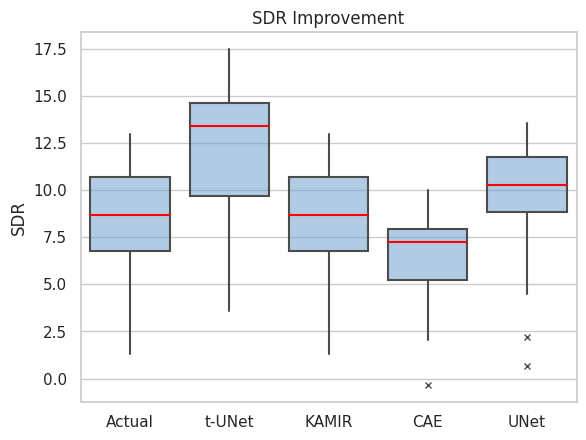

In [81]:
ax = sns.boxplot(
    data=data2,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "red"},
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

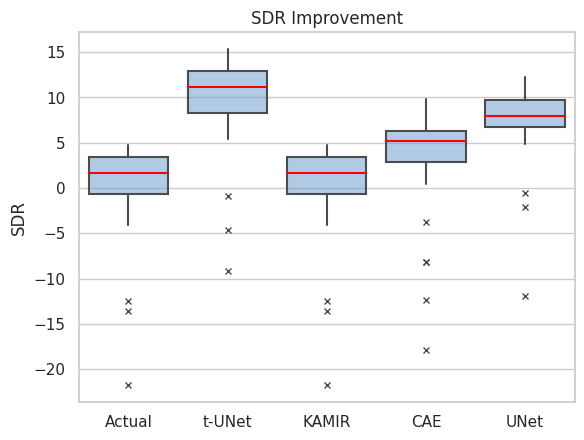

In [82]:
ax = sns.boxplot(
    data=data3,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "red"},
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

# iwaveunet (dialated convolutions)

In [83]:
iwaveunet = pd.read_csv(path+'iwaveunet_dialated.csv')

In [84]:
data1 = [test1['Overall sdr'], test1['Pred Overall sdr'], 
         kamir1['Overall sdr'], dca1['Pred Overall sdr'], 
         unet['Pred Overall sdr'][:100], iwaveunet['Pred Overall sdr'][:100]]
data2 = [test2['Overall sdr'][:25], test2['Pred Overall sdr'][:25], 
         kamir2['Overall sdr'][:25], dca2['Pred Overall sdr'][:25], 
         unet['Pred Overall sdr'][:25], iwaveunet['Pred Overall sdr'][:25]]
data3 = [test2['Overall sdr'][25:], test2['Pred Overall sdr'][25:], 
         kamir2['Overall sdr'][25:], dca2['Pred Overall sdr'][25:], 
         unet['Pred Overall sdr'][25:50], iwaveunet['Pred Overall sdr'][25:50]]

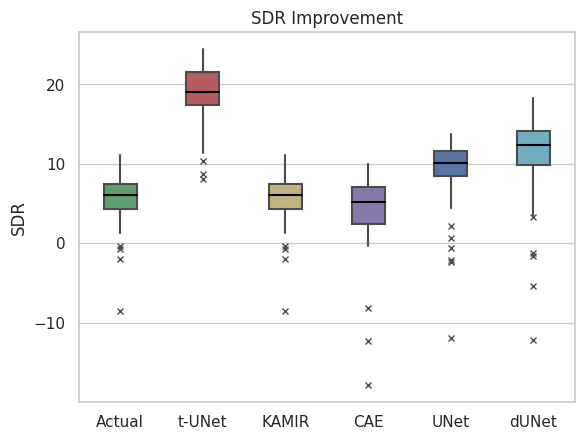

In [85]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data1,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

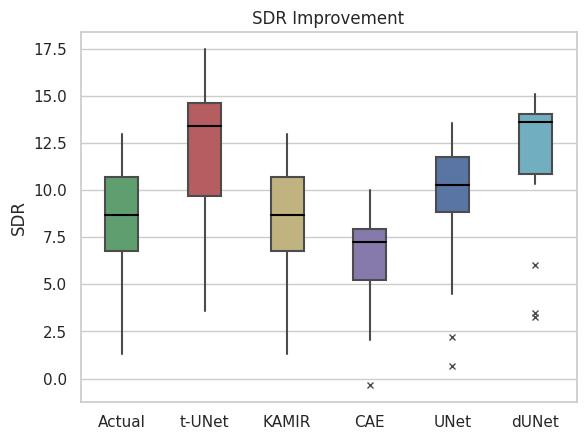

In [86]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data2,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

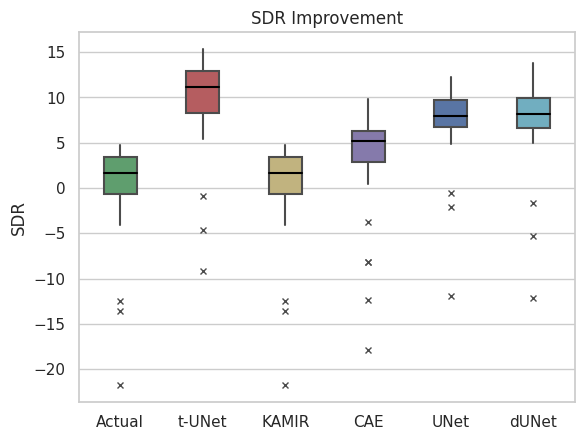

In [87]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data3,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

# Dialated Convolutions + shuffled Inputs

In [88]:
iwaveunet_shuffled = pd.read_csv(path+'Shufflediwaveunet.csv')

In [89]:
data1 = [test1['Overall sdr'], test1['Pred Overall sdr'], 
         kamir1['Overall sdr'], dca1['Pred Overall sdr'], 
         unet['Pred Overall sdr'][:100], iwaveunet['Pred Overall sdr'][:100],
        iwaveunet_shuffled['Pred Overall sdr'][:100]]
data2 = [test2['Overall sdr'][:25], test2['Pred Overall sdr'][:25], 
         kamir2['Overall sdr'][:25], dca2['Pred Overall sdr'][:25], 
         unet['Pred Overall sdr'][:25], iwaveunet['Pred Overall sdr'][:25],
        iwaveunet_shuffled['Pred Overall sdr'][:25]]
data3 = [test2['Overall sdr'][25:], test2['Pred Overall sdr'][25:], 
         kamir2['Overall sdr'][25:], dca2['Pred Overall sdr'][25:], 
         unet['Pred Overall sdr'][25:50], iwaveunet['Pred Overall sdr'][25:50],
        iwaveunet_shuffled['Pred Overall sdr'][25:50]]

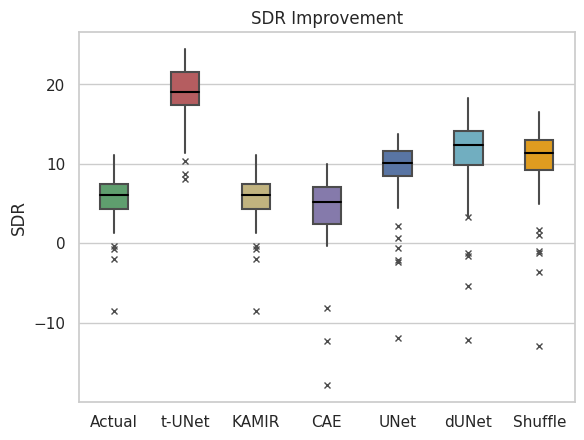

In [90]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:'orange'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=data1,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'Shuffle'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

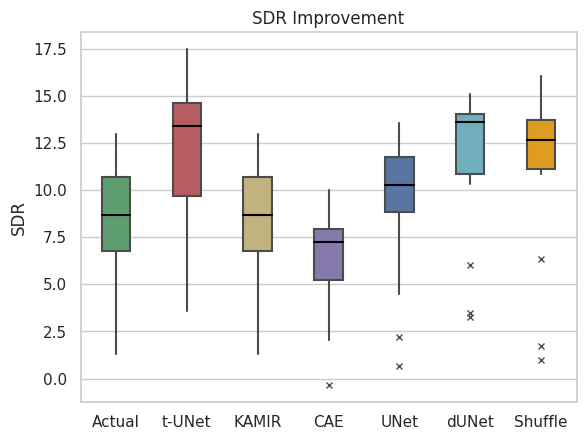

In [91]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:'orange'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=data2,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'Shuffle'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

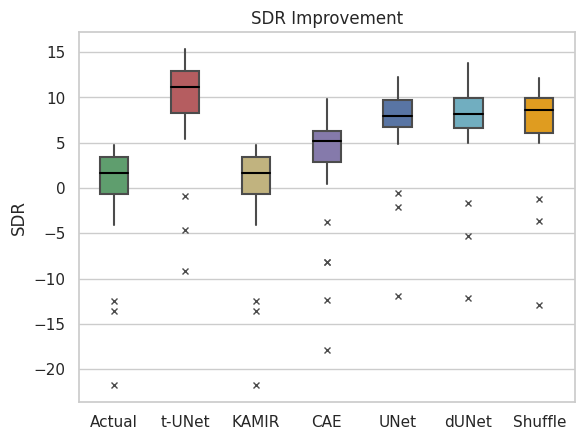

In [92]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:'orange'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=data3,
    notch=False, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'Shuffle'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

# Graph Embeddings

In [93]:
graphembed = pd.read_csv(path+'sdr_ge.csv')

In [94]:
data1 = [test1['Overall sdr'], test1['Pred Overall sdr'], 
         kamir1['Overall sdr'], dca1['Pred Overall sdr'], 
         unet['Pred Overall sdr'][:100], iwaveunet['Pred Overall sdr'][:100],
        graphembed['Pred Overall sdr'][:100]]
data2 = [test2['Overall sdr'][:25], test2['Pred Overall sdr'][:25], 
         kamir2['Overall sdr'][:25], dca2['Pred Overall sdr'][:25], 
         unet['Pred Overall sdr'][:25], iwaveunet['Pred Overall sdr'][:25],
        graphembed['Pred Overall sdr'][:25]]
data3 = [test2['Overall sdr'][25:], test2['Pred Overall sdr'][25:], 
         kamir2['Overall sdr'][25:], dca2['Pred Overall sdr'][25:], 
         unet['Pred Overall sdr'][25:50], iwaveunet['Pred Overall sdr'][25:50],
        graphembed['Pred Overall sdr'][25:50]]

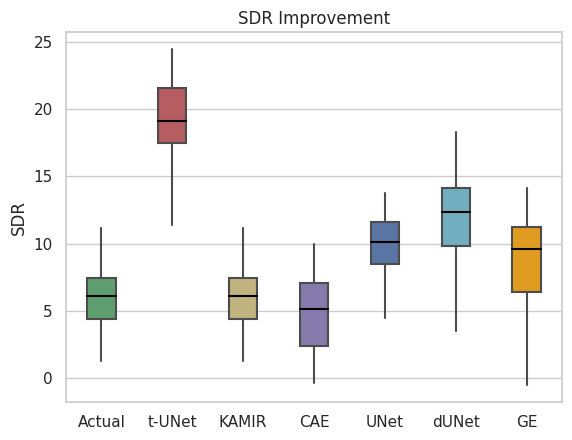

In [95]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'GE'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

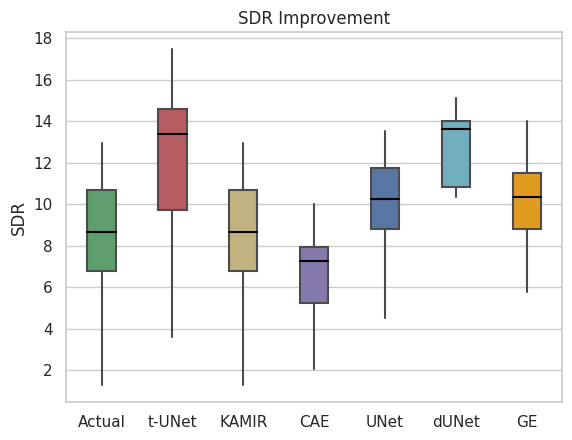

In [96]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data2,
    notch=False, showcaps=False, showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'GE'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

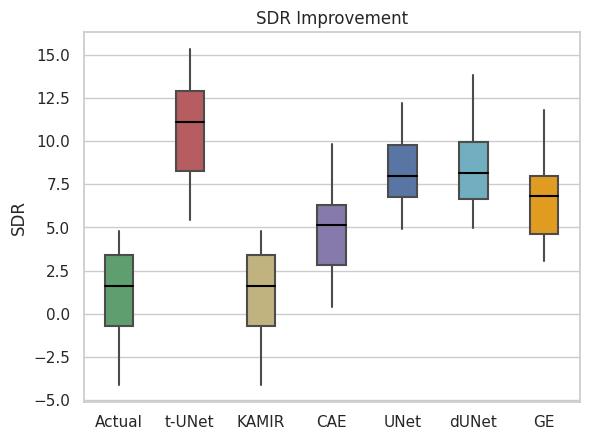

In [97]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data3,
    notch=False, showcaps=False, showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'GE'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

# Graph Embeddings TypeIII

In [98]:
type3 = pd.read_csv(path+'type3.csv')

In [99]:
data1 = [test1['Overall sdr'], test1['Pred Overall sdr'], 
         kamir1['Overall sdr'], dca1['Pred Overall sdr'], 
         unet['Pred Overall sdr'][:100], iwaveunet['Pred Overall sdr'][:100],
        graphembed['Pred Overall sdr'][:100], type3['Pred Overall sdr'][:100]]
data2 = [test2['Overall sdr'][:25], test2['Pred Overall sdr'][:25], 
         kamir2['Overall sdr'][:25], dca2['Pred Overall sdr'][:25], 
         unet['Pred Overall sdr'][:25], iwaveunet['Pred Overall sdr'][:25],
        graphembed['Pred Overall sdr'][:25], type3['Pred Overall sdr'][:25]]
data3 = [test2['Overall sdr'][25:], test2['Pred Overall sdr'][25:], 
         kamir2['Overall sdr'][25:], dca2['Pred Overall sdr'][25:], 
         unet['Pred Overall sdr'][25:50], iwaveunet['Pred Overall sdr'][25:50],
        graphembed['Pred Overall sdr'][25:50], type3['Pred Overall sdr'][25:50]]

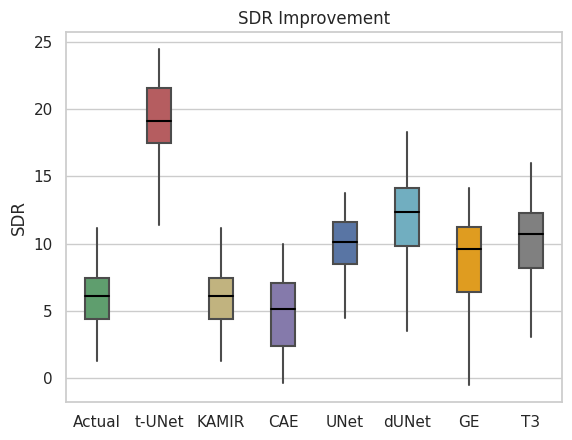

In [100]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'GE', 'T3'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

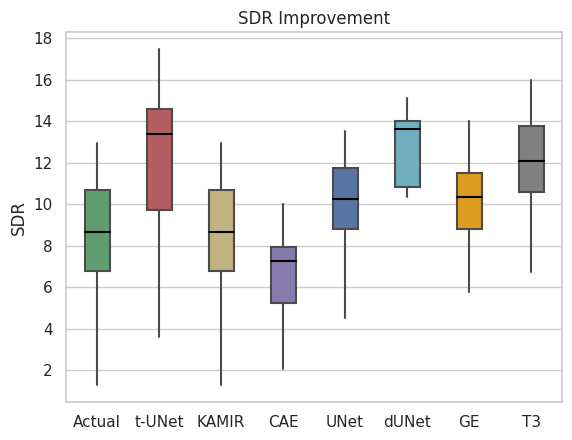

In [101]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data2,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'GE', 'T3'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

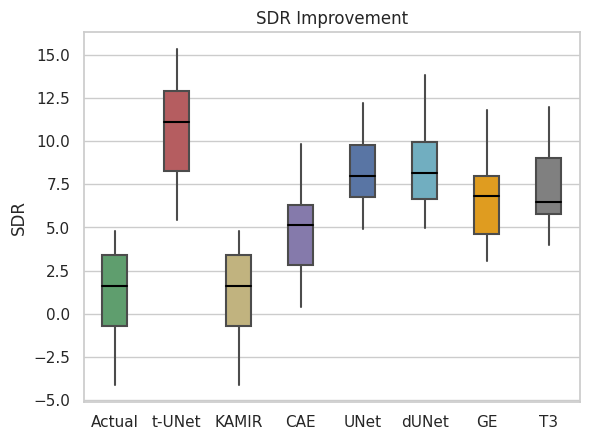

In [102]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey"}
sns.set(style="whitegrid")

'''
ax = sns.boxplot(medianprops={"color": "black"}, showfliers = False,
    data=[kamirc, testc, dcac], notch=False, showcaps=False, palette=my_clr,
                width=0.2)
'''

ax = sns.boxplot(
    data=data3,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 't-UNet', 'KAMIR', 'CAE', 'UNet', 'dUNet', 'GE', 'T3'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

# WASPAA REBUTTAL

In [32]:
wpath = "/home/rajesh/Desktop/SDR/Rebuttal_WASPAA/"
org = pd.read_csv(wpath+'sdr_org.csv')
rir = pd.read_csv(wpath+'sdr_reverb.csv')
sdr = pd.read_csv(wpath+'sdr.csv')
cae_rev = pd.read_csv(wpath+'CAEsdr_reverb.csv')

In [33]:
org = org[:100]
rir = rir[:100]
sdr = sdr[:100]
cae_rev = cae_rev[:100]

In [34]:
data1 = [test1['Overall sdr'], kamir1['Overall sdr'], 
         dca1['Pred Overall sdr'], cae_rev['Pred Overall sdr'],
        org['Pred Overall sdr'][:100], sdr['Pred Overall sdr'][:100]]

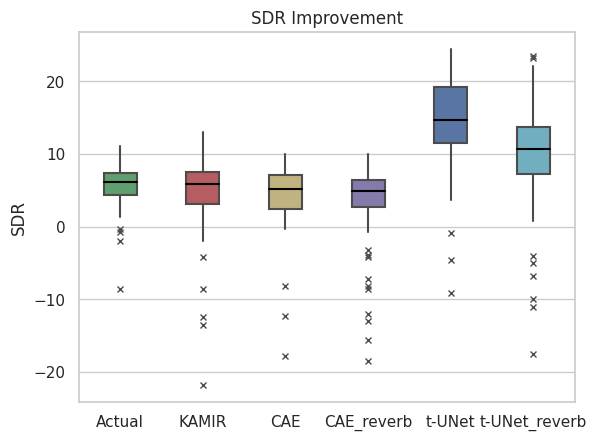

In [35]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey"}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=data1,
    notch=False, showcaps=False,  showfliers = True,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 'KAMIR', 'CAE', 'CAE_reverb', 't-UNet', 't-UNet_reverb'])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

In [36]:
wpath = "/home/rajesh/Desktop/SDR/Rebuttal_WASPAA/"
org = pd.read_csv(wpath+'sdr_org.csv')
rir = pd.read_csv(wpath+'sdr_reverb.csv')
sdr = pd.read_csv(wpath+'sdr.csv')
cae_revb = pd.read_csv(wpath+'CAEsdr_reverb.csv')
new_sdr = pd.read_csv(wpath+'sdr_new.csv')
finetuned_tunet = pd.read_csv(wpath+'sdr_finetune.csv')

In [37]:
org = org[:100]
rir = rir[:100]
sdr = sdr[:100]
cae_revb = cae_revb[:100]
new_sdr = new_sdr[:100]
finetuned_tunet = finetuned_tunet[:100]

In [38]:
data1 = [test1['Overall sdr'], kamir1['Overall sdr'], 
         dca1['Pred Overall sdr'], cae_revb['Pred Overall sdr'],
        org['Pred Overall sdr'][:100], sdr['Pred Overall sdr'][:100],
        new_sdr['Overall sdr'][:100], new_sdr['Pred Overall sdr'][:100]]

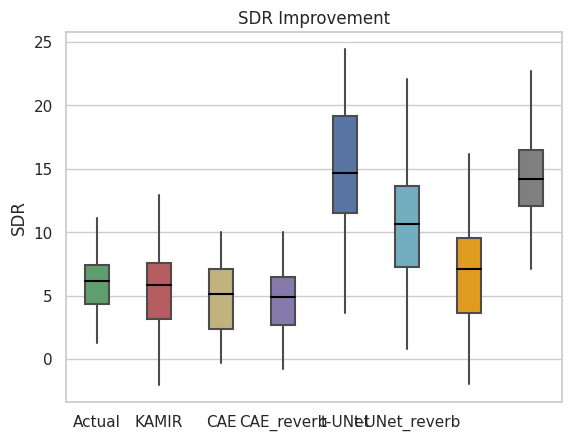

In [39]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=data1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Actual', 'KAMIR', 'CAE', 'CAE_reverb', 't-UNet', 't-UNet_reverb', '', ''])
#plt.xticks(rotation=0, ha='right')
ax.plot()
plt.show()

In [40]:
cae_finetuned = pd.read_csv(wpath+'cae_finetunedoldsdr.csv')
cae_finetuned2 = pd.read_csv(wpath+'caefinetuned2.csv')

In [41]:
kamir_wr = pd.concat([kamir1['Pred Overall sdr'][:50], kamir2['Pred Overall sdr'][:50]], ignore_index=True)
cae_wr = dca['Pred bass sdr']
tunet_wr = pd.concat([test1['Pred Overall sdr'][:50], test2['Pred Overall sdr'][:50]], ignore_index=True)
cae_rev = cae_revb['Pred Overall sdr']
tunet_rev = new_sdr['Pred Overall sdr']
tunet_finetuned = finetuned_tunet['Pred Overall sdr']
cae_fin = cae_finetuned['Pred Overall sdr']
cae_fin2 = cae_finetuned2['Pred Overall sdr']

In [42]:
rebuttal = [kamir_wr, cae_wr, cae_fin, cae_rev, tunet_wr, tunet_finetuned, tunet_rev]

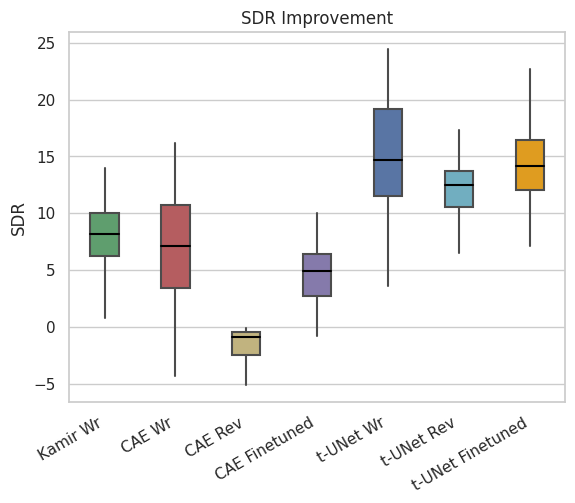

In [43]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=rebuttal,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.4,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR Improvement')
ax.set_xticklabels(['Kamir Wr', 'CAE Wr', 'CAE Rev', 'CAE Finetuned', 't-UNet Wr', 't-UNet Rev', 't-UNet Finetuned'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()